In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import re

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
data = pd.read_csv("/content/drive/My Drive/TMI /major.csv")

In [ ]:
data_dup = data.drop_duplicates(subset = ['주소']) # 중복 제거

합격 자소서 학력 분석

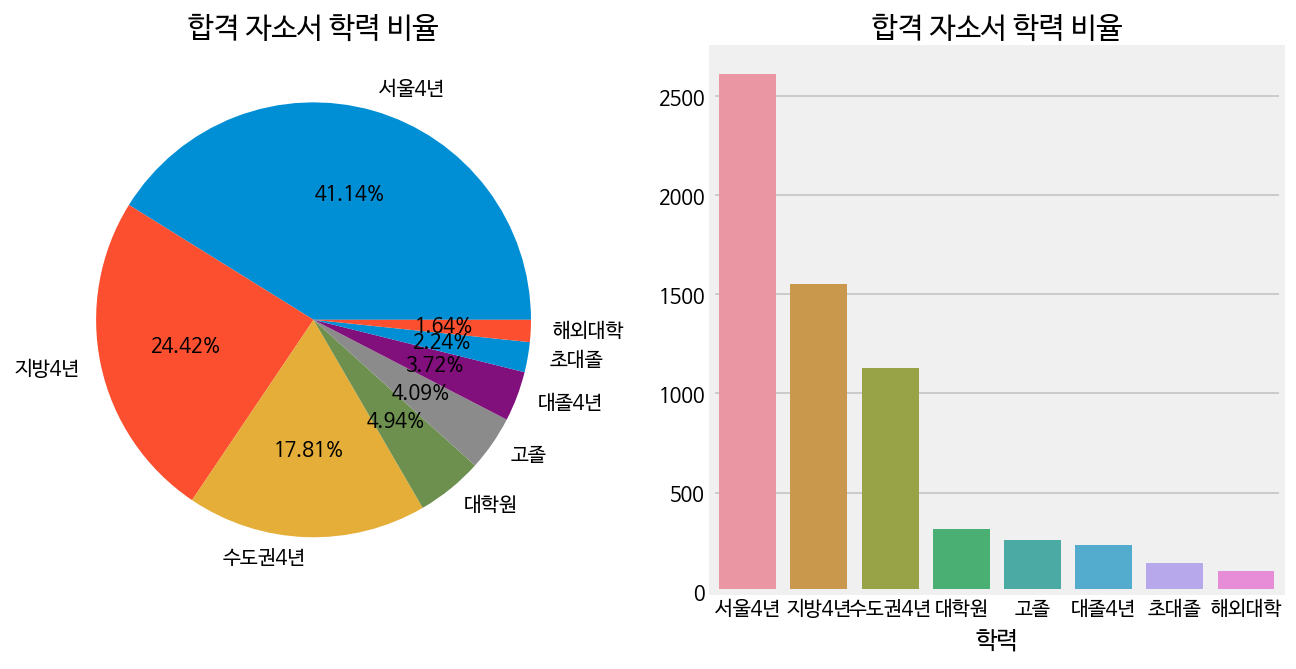

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
data_dup['학력'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[0])
ax[0].set_title('합격 자소서 학력 비율')
ax[0].set_ylabel('')
sns.countplot('학력', data=data_dup, ax=ax[1],order = data_dup['학력'].value_counts().index)
ax[1].set_title('합격 자소서 학력 비율')
ax[1].set_ylabel('')
plt.show()

상위 전공 분석

Text(0.5, 0, '')

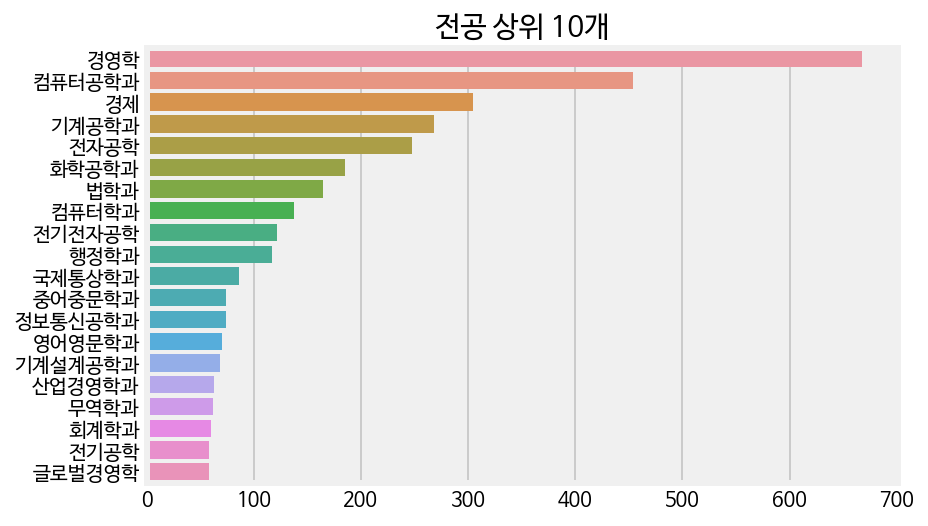

In [ ]:
major=data_dup[data_dup['전공']!=" "]['전공'].value_counts()[:20].to_frame()
sns.barplot(major['전공'],major.index)
plt.title('전공 상위 10개')
plt.xlabel('')

In [ ]:
data_score=data_dup[data_dup['학점'].str.contains('/4.5',na=False)]#['학점'].str.split("/").apply(lambda x: x[0])
data_score['학점']=data_score['학점'].str.split("/").apply(lambda x: x[0])#.dropna()

합격 자소서 평균 학점

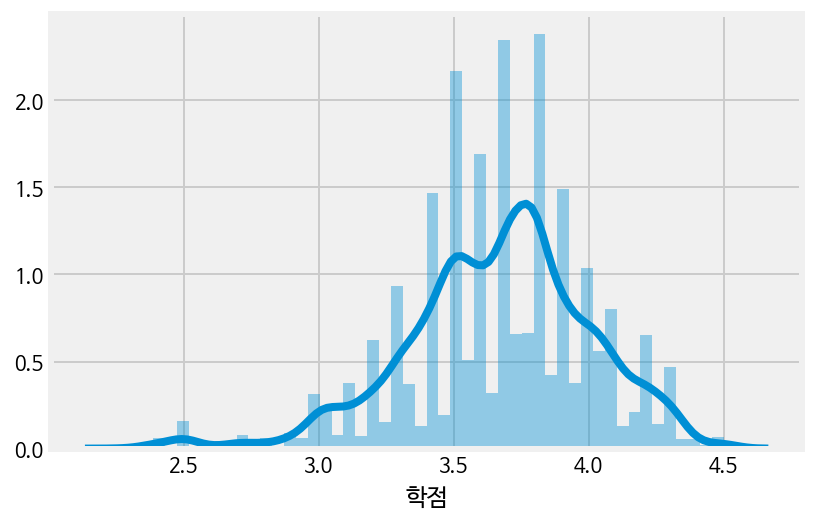

In [ ]:
sns.distplot(data_score['학점'].dropna())

스펙별 평균 학점

Text(0.5, 1.0, '수도권4년 학점')

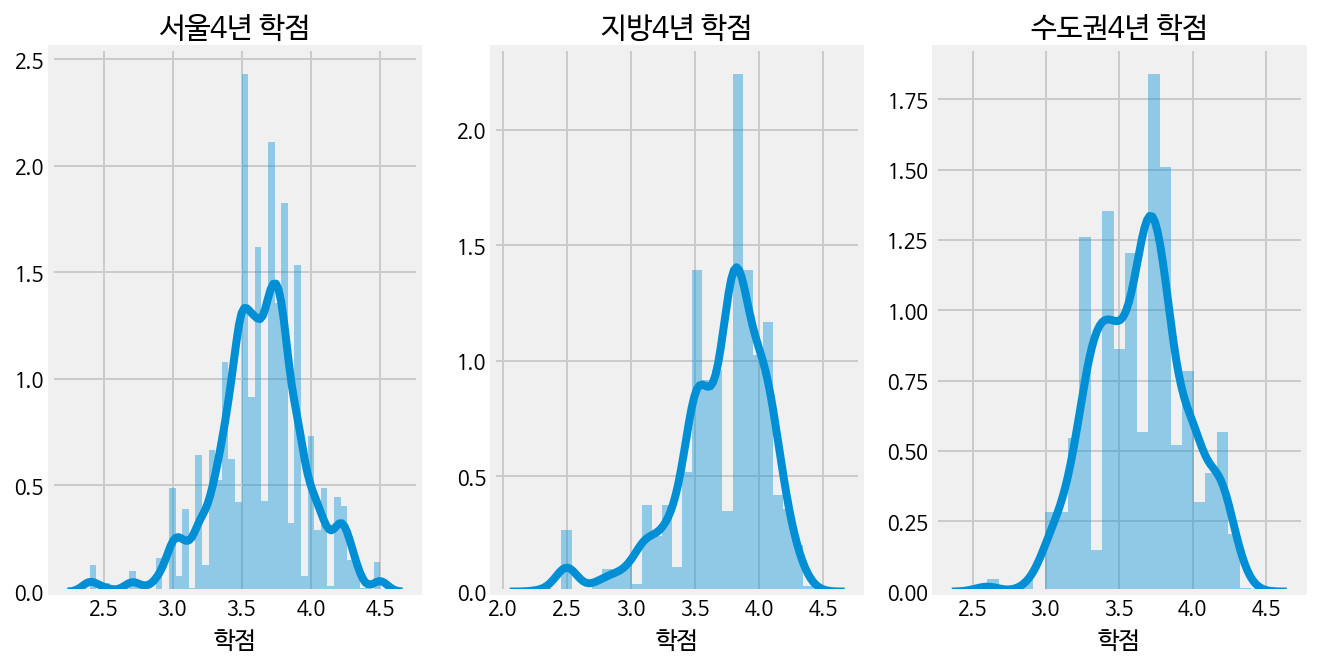

In [ ]:
f,ax=plt.subplots(1,3,figsize=(10,5))
sns.distplot(data_score[data_score['학력']=="서울4년"]["학점"].dropna(),ax=ax[0])
ax[0].set_title('서울4년 학점')
sns.distplot(data_score[data_score['학력']=="지방4년"]["학점"].dropna(),ax=ax[1])
ax[1].set_title('지방4년 학점')
sns.distplot(data_score[data_score['학력']=="수도권4년"]["학점"].dropna(),ax=ax[2])
ax[2].set_title('수도권4년 학점')
#sns.distplot(data_score[data_score['학력']=="대학원"]["학점"].dropna(),ax=ax[0,3])
#ax[0,3].set_title('대학원 학점')
#sns.distplot(data_score[data_score['학력']=="대졸4년"]["학점"].dropna(),ax=ax[1,0])
#ax[1,0].set_title('대졸4년 학점')
#sns.distplot(data_score[data_score['학력']=="초대졸"]["학점"].dropna(),ax=ax[1,1])
#ax[1,1].set_title('초대졸 학점')
#sns.distplot(data_score[data_score['학력']=="해외대학"]["학점"].dropna(),ax=ax[1,2])
#ax[1,2].set_title('해외대학 학점')

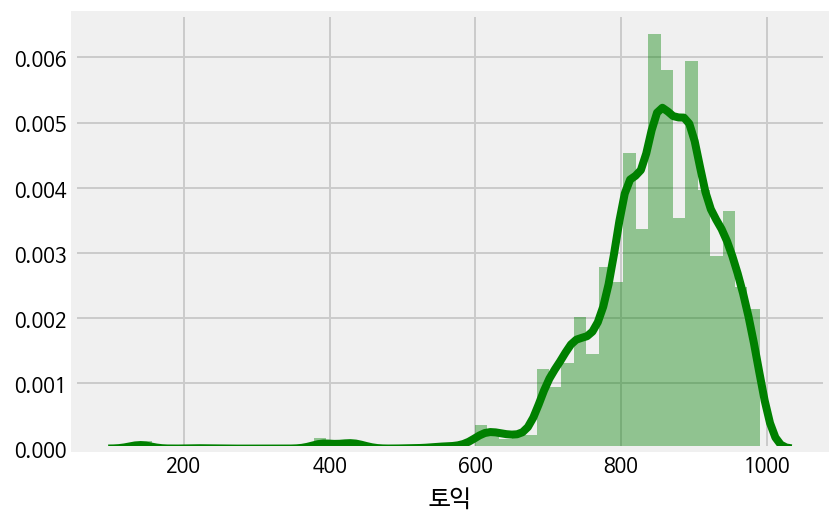

In [ ]:
sns.distplot(data_score['토익'].dropna(),color="green")

Text(0.5, 1.0, '수도권4년 토익 점수')

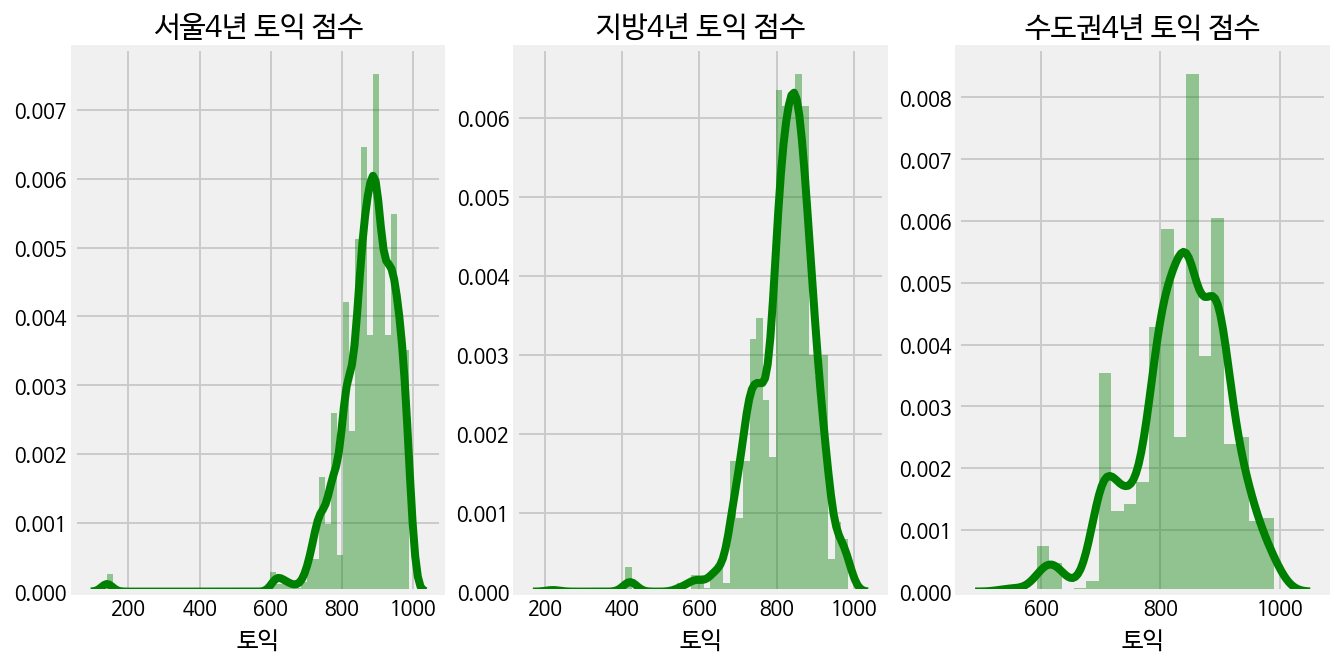

In [ ]:
f,ax=plt.subplots(1,3,figsize=(10,5))
sns.distplot(data_score[data_score['학력']=="서울4년"]["토익"].dropna(),ax=ax[0],color="green")
ax[0].set_title('서울4년 토익 점수')
sns.distplot(data_score[data_score['학력']=="지방4년"]["토익"].dropna(),ax=ax[1],color="green")
ax[1].set_title('지방4년 토익 점수')
sns.distplot(data_score[data_score['학력']=="수도권4년"]["토익"].dropna(),ax=ax[2],color="green")
ax[2].set_title('수도권4년 토익 점수')
#sns.distplot(data_score[data_score['학력']=="대학원"]["토익"].dropna(),ax=ax[0,3])
#ax[0,3].set_title('대학원 토익 점수')
#sns.distplot(data_score[data_score['학력']=="대졸4년"]["토익"].dropna(),ax=ax[1,0])
#ax[1,0].set_title('대졸4년 토익 점수')
#sns.distplot(data_score[data_score['학력']=="초대졸"]["토익"].dropna(),ax=ax[1,1])
#ax[1,1].set_title('초대졸 토익 점수')
#sns.distplot(data_score[data_score['학력']=="해외대학"]["토익"].dropna(),ax=ax[1,2])
#ax[1,2].set_title('해외대학 토익 점수')

In [ ]:
data_dup['평가'].value_counts()

2.0    1479
3.0     857
4.0     430
1.0     199
5.0     118
4.5       7
3.5       6
0.0       3
0.5       1
Name: 평가, dtype: int64

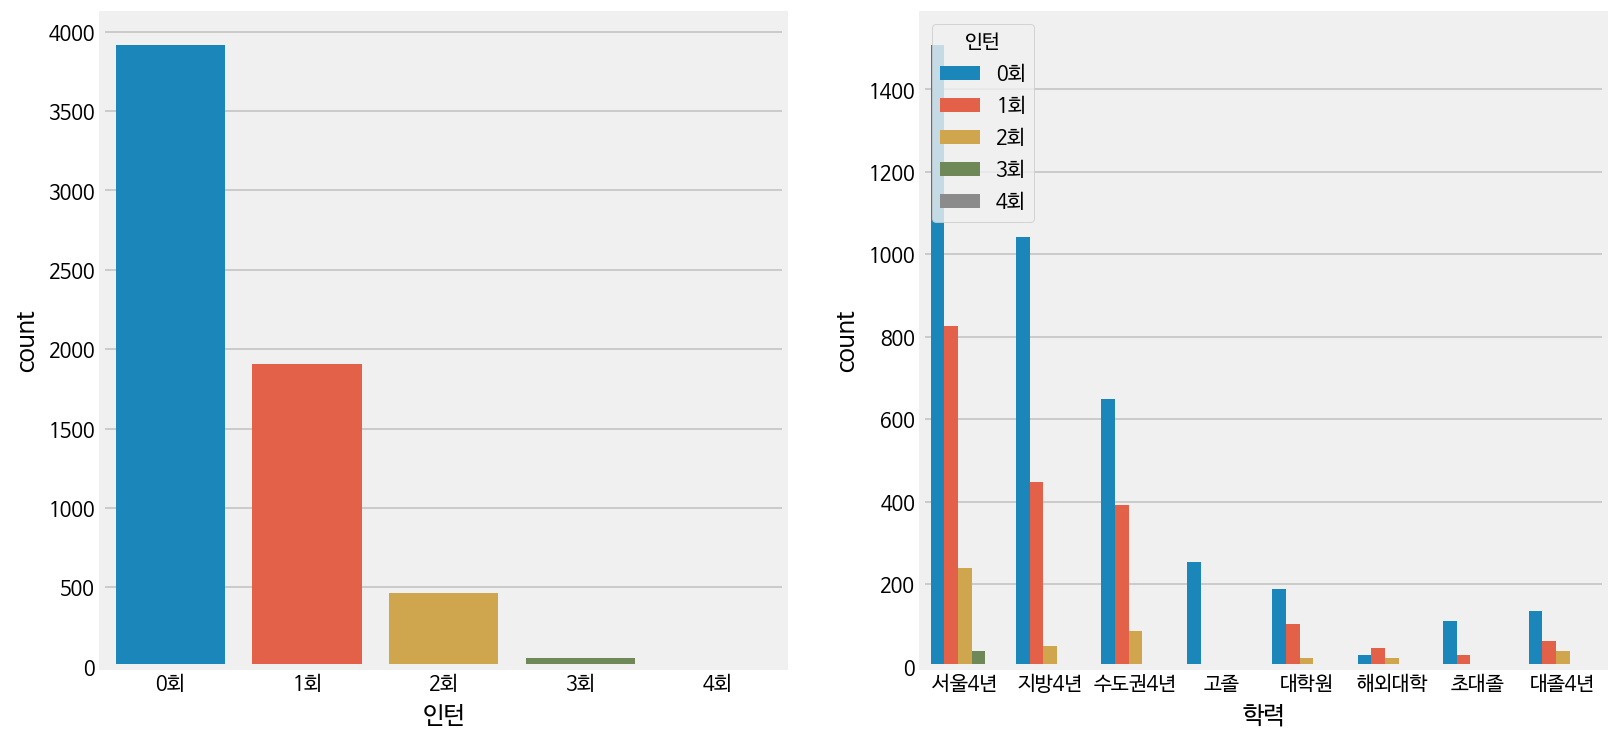

In [ ]:
data_dup["인턴"]=data_dup['인턴'].fillna("0회")
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('인턴', data=data_dup,order = data_dup['인턴'].value_counts().index,ax=ax[0])
sns.countplot('학력', hue= "인턴", data=data_dup,ax=ax[1])

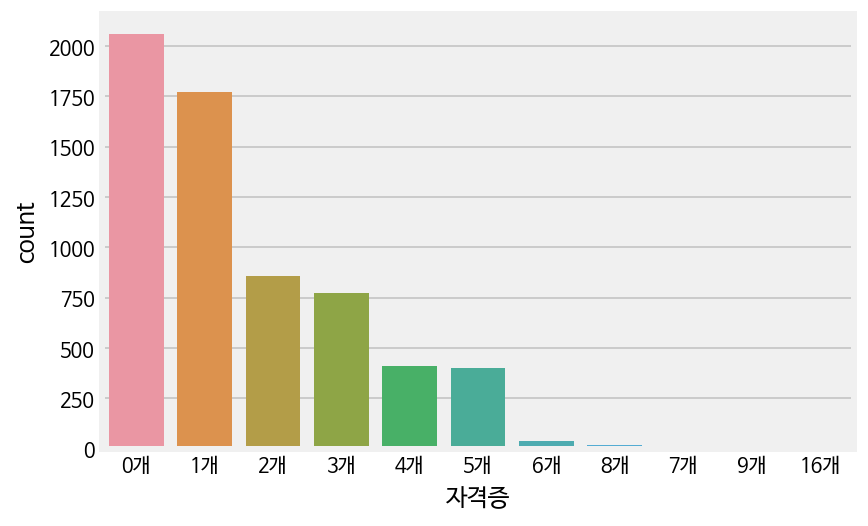

In [ ]:
data_dup["자격증"]=data_dup['자격증'].fillna("0개")
sns.countplot('자격증', data=data_dup,order = data_dup['자격증'].value_counts().index)